# TPHLCT 3階の導関数を相殺する

In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm._tqdm_notebook import tqdm_notebook
from scipy.fftpack import dct, idct
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
from skimage.measure import compare_psnr as psnr
import pandas as pd

%matplotlib inline


class ImageLoader:
    def __init__(self, FILE_PATH):
        self.img = np.array(Image.open(FILE_PATH))
        # 行数
        self.row_blocks_count = self.img.shape[0] // 8
        # 列数
        self.col_blocks_count = self.img.shape[1] // 8

    def get_points(self, POINT):
        Row = random.randint(0, len(self.img) - POINT - 1)
        Col = random.randint(0, len(self.img) - 1)
        return self.img[Row : Row + POINT, Col]

    def get_block(self, col, row):
        return self.img[col * 8 : (col + 1) * 8, row * 8 : (row + 1) * 8]


# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams["font.family"] = "Source Han Sans JP"  # 使用するフォント
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.width"] = 1.0  # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0  # y軸主目盛り線の線幅
plt.rcParams["font.size"] = 12  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.0  # 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

MONO_DIR_PATH = "../../Mono/"
OUTPUT_DIR_PATH = "../../Plot_tool/output/images/TPHLCT3/32x32/"
AIRPLANE = ImageLoader(MONO_DIR_PATH + "airplane512.bmp")
BARBARA = ImageLoader(MONO_DIR_PATH + "barbara512.bmp")
BOAT = ImageLoader(MONO_DIR_PATH + "boat512.bmp")
GOLDHILL = ImageLoader(MONO_DIR_PATH + "goldhill512.bmp")
LENNA = ImageLoader(MONO_DIR_PATH + "lenna512.bmp")
MANDRILL = ImageLoader(MONO_DIR_PATH + "mandrill512.bmp")
MILKDROP = ImageLoader(MONO_DIR_PATH + "milkdrop512.bmp")
SAILBOAT = ImageLoader(MONO_DIR_PATH + "sailboat512.bmp")

Images = np.array(
    [
        AIRPLANE,
        BARBARA,
        BOAT,
        GOLDHILL,
        LENNA,
        MANDRILL,
        MILKDROP,
        SAILBOAT
    ]
)

N = 32

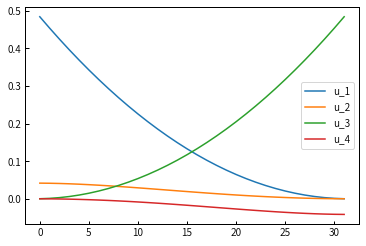

In [2]:
sampling_x = (0.5 + np.arange(N)) / N
u_1 = (1 - sampling_x) ** 2 / 2
u_2 = 1 / 24 - sampling_x ** 2 / 6 + sampling_x ** 3 / 6 - sampling_x ** 4 / 24
u_3 = sampling_x ** 2 / 2
u_4 = -sampling_x ** 2 / 12 + sampling_x ** 4 / 24
plt.plot(u_1, label="u_1")
plt.plot(u_2, label="u_2")
plt.plot(u_3, label="u_3")
plt.plot(u_4, label="u_4")
plt.legend()

In [3]:
ak = - scipy.fftpack.dct(u_1,norm="ortho")
ak

array([-9.42578864e-01, -8.10243674e-01, -2.02315746e-01, -8.97352733e-02,
       -5.03306486e-02, -3.20903214e-02, -2.21802622e-02, -1.62029774e-02,
       -1.23215704e-02, -9.65848827e-03, -7.75151710e-03, -6.33840654e-03,
       -5.26136563e-03, -4.42082807e-03, -3.75144214e-03, -3.20886401e-03,
       -2.76213586e-03, -2.38910402e-03, -2.07356609e-03, -1.80343954e-03,
       -1.56955394e-03, -1.36483505e-03, -1.18374180e-03, -1.02186977e-03,
       -8.75667049e-04, -7.42226865e-04, -6.19133680e-04, -5.04346991e-04,
       -3.96111897e-04, -2.92888805e-04, -1.93296799e-04, -9.60665949e-05])

In [4]:
bk = scipy.fftpack.dct(u_2,norm="ortho")
bk

array([1.09994382e-01, 8.21278487e-02, 5.13298176e-03, 1.01391469e-03,
       3.20802291e-04, 1.31394699e-04, 6.33601140e-05, 3.41952121e-05,
       2.00398805e-05, 1.25062623e-05, 8.20094224e-06, 5.59700060e-06,
       3.94751701e-06, 2.86162774e-06, 2.12308561e-06, 1.60652401e-06,
       1.23630756e-06, 9.65206497e-07, 7.62828824e-07, 6.09091833e-07,
       4.90407443e-07, 3.97383602e-07, 3.23400654e-07, 2.63707517e-07,
       2.14834779e-07, 1.74205550e-07, 1.39872296e-07, 1.10335392e-07,
       8.44154936e-08, 6.11617680e-08, 3.97841193e-08, 1.96014032e-08])

In [5]:
ck = scipy.fftpack.dct(u_3,norm="ortho")
ck

array([ 9.42578864e-01, -8.10243674e-01,  2.02315746e-01, -8.97352733e-02,
        5.03306486e-02, -3.20903214e-02,  2.21802622e-02, -1.62029774e-02,
        1.23215704e-02, -9.65848827e-03,  7.75151710e-03, -6.33840654e-03,
        5.26136563e-03, -4.42082807e-03,  3.75144214e-03, -3.20886401e-03,
        2.76213586e-03, -2.38910402e-03,  2.07356609e-03, -1.80343954e-03,
        1.56955394e-03, -1.36483505e-03,  1.18374180e-03, -1.02186977e-03,
        8.75667049e-04, -7.42226865e-04,  6.19133680e-04, -5.04346991e-04,
        3.96111897e-04, -2.92888805e-04,  1.93296799e-04, -9.60665949e-05])

In [6]:
dk = scipy.fftpack.dct(u_4,norm="ortho")
dk

array([-1.09994382e-01,  8.21278487e-02, -5.13298176e-03,  1.01391469e-03,
       -3.20802291e-04,  1.31394699e-04, -6.33601140e-05,  3.41952121e-05,
       -2.00398805e-05,  1.25062623e-05, -8.20094224e-06,  5.59700060e-06,
       -3.94751701e-06,  2.86162774e-06, -2.12308561e-06,  1.60652401e-06,
       -1.23630756e-06,  9.65206497e-07, -7.62828824e-07,  6.09091833e-07,
       -4.90407443e-07,  3.97383602e-07, -3.23400654e-07,  2.63707517e-07,
       -2.14834779e-07,  1.74205550e-07, -1.39872296e-07,  1.10335392e-07,
       -8.44154936e-08,  6.11617680e-08, -3.97841193e-08,  1.96014032e-08])

In [7]:
alpha = ak
alpha

array([-9.42578864e-01, -8.10243674e-01, -2.02315746e-01, -8.97352733e-02,
       -5.03306486e-02, -3.20903214e-02, -2.21802622e-02, -1.62029774e-02,
       -1.23215704e-02, -9.65848827e-03, -7.75151710e-03, -6.33840654e-03,
       -5.26136563e-03, -4.42082807e-03, -3.75144214e-03, -3.20886401e-03,
       -2.76213586e-03, -2.38910402e-03, -2.07356609e-03, -1.80343954e-03,
       -1.56955394e-03, -1.36483505e-03, -1.18374180e-03, -1.02186977e-03,
       -8.75667049e-04, -7.42226865e-04, -6.19133680e-04, -5.04346991e-04,
       -3.96111897e-04, -2.92888805e-04, -1.93296799e-04, -9.60665949e-05])

In [8]:
beta = ck
beta

array([ 9.42578864e-01, -8.10243674e-01,  2.02315746e-01, -8.97352733e-02,
        5.03306486e-02, -3.20903214e-02,  2.21802622e-02, -1.62029774e-02,
        1.23215704e-02, -9.65848827e-03,  7.75151710e-03, -6.33840654e-03,
        5.26136563e-03, -4.42082807e-03,  3.75144214e-03, -3.20886401e-03,
        2.76213586e-03, -2.38910402e-03,  2.07356609e-03, -1.80343954e-03,
        1.56955394e-03, -1.36483505e-03,  1.18374180e-03, -1.02186977e-03,
        8.75667049e-04, -7.42226865e-04,  6.19133680e-04, -5.04346991e-04,
        3.96111897e-04, -2.92888805e-04,  1.93296799e-04, -9.60665949e-05])

In [9]:
Ak = (2 * ak - 16 * bk) / np.sqrt(N)
Ak

array([-6.44363046e-01, -5.18757033e-01, -8.60476830e-02, -3.45939939e-02,
       -1.87019374e-02, -1.17172823e-02, -8.02111637e-03, -5.82533628e-03,
       -4.41301434e-03, -3.45016433e-03, -2.76377092e-03, -2.25679583e-03,
       -1.87133892e-03, -1.57109266e-03, -1.33234008e-03, -1.13904869e-03,
       -9.80059306e-04, -8.47405844e-04, -7.35273927e-04, -6.39334937e-04,
       -5.56308197e-04, -4.83666031e-04, -4.19430641e-04, -3.62031398e-04,
       -3.10202699e-04, -2.62909552e-04, -2.19292430e-04, -1.78625664e-04,
       -1.40285467e-04, -1.03724822e-04, -6.84532652e-05, -3.40201115e-05])

In [10]:
Bk = (2 * ck - 16 * dk) / np.sqrt(N)
Bk

array([ 6.44363046e-01, -5.18757033e-01,  8.60476830e-02, -3.45939939e-02,
        1.87019374e-02, -1.17172823e-02,  8.02111637e-03, -5.82533628e-03,
        4.41301434e-03, -3.45016433e-03,  2.76377092e-03, -2.25679583e-03,
        1.87133892e-03, -1.57109266e-03,  1.33234008e-03, -1.13904869e-03,
        9.80059306e-04, -8.47405844e-04,  7.35273927e-04, -6.39334937e-04,
        5.56308197e-04, -4.83666031e-04,  4.19430641e-04, -3.62031398e-04,
        3.10202699e-04, -2.62909552e-04,  2.19292430e-04, -1.78625664e-04,
        1.40285467e-04, -1.03724822e-04,  6.84532652e-05, -3.40201115e-05])

In [11]:
Ck = (2 * ak - 32 * bk) / np.sqrt(N)
Ck

array([-9.55474138e-01, -7.51049668e-01, -1.00565948e-01, -3.74617777e-02,
       -1.96093033e-02, -1.20889226e-02, -8.20032583e-03, -5.92205494e-03,
       -4.46969569e-03, -3.48553738e-03, -2.78696669e-03, -2.27262654e-03,
       -1.88250419e-03, -1.57918656e-03, -1.33834507e-03, -1.14359262e-03,
       -9.83556112e-04, -8.50135860e-04, -7.37431533e-04, -6.41057709e-04,
       -5.57695279e-04, -4.84790002e-04, -4.20345356e-04, -3.62777276e-04,
       -3.10810343e-04, -2.63402280e-04, -2.19688049e-04, -1.78937740e-04,
       -1.40524230e-04, -1.03897813e-04, -6.85657917e-05, -3.40755526e-05])

In [12]:
Dk = (2 * ck - 32 * dk) / np.sqrt(N)
Dk

array([ 9.55474138e-01, -7.51049668e-01,  1.00565948e-01, -3.74617777e-02,
        1.96093033e-02, -1.20889226e-02,  8.20032583e-03, -5.92205494e-03,
        4.46969569e-03, -3.48553738e-03,  2.78696669e-03, -2.27262654e-03,
        1.88250419e-03, -1.57918656e-03,  1.33834507e-03, -1.14359262e-03,
        9.83556112e-04, -8.50135860e-04,  7.37431533e-04, -6.41057709e-04,
        5.57695279e-04, -4.84790002e-04,  4.20345356e-04, -3.62777276e-04,
        3.10810343e-04, -2.63402280e-04,  2.19688049e-04, -1.78937740e-04,
        1.40524230e-04, -1.03897813e-04,  6.85657917e-05, -3.40755526e-05])

# 量子化テーブル

In [13]:
Q50_Luminance = np.array(
    [
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]
)

In [14]:
option = str(N) + "x" + str(N)
img_name = ["Airplane","Barbara","Boat","Goldhill","Lenna","Mandrill","Milkdrop","Sailboat"]
df = pd.read_excel("../../Plot_tool/xlsx/TPHLCT3_"+ option +".xlsx",sheet_name=None)

for i in range(len(Images)):
    name = img_name[i]
    IMG = Images[i]
    df_Q = df[name]["Q"]
 
    for j in range(13):
        bpp = 0.2 + 0.05 * j
        Q = df_Q[j]
 
        Fk = np.zeros(IMG.img.shape)
        # 縦方向
        for row in range(IMG.img.shape[0] // N):
            for col in range(IMG.img.shape[1]):
                eight_points = IMG.img[N * row : N * (row + 1), col]
                c = scipy.fftpack.dct(eight_points,norm="ortho")
                Fk[N * row : N * (row + 1), col] = c

        for row in range(Fk.shape[0] // N):
            for col in range(Fk.shape[1]):
                F = Fk[N * row : N * (row + 1), col]

                F_0_r = 0
                F_1_r = 0
                if row is not Fk.shape[0] // N - 1:
                    F_0_r = Fk[N * (row + 1), col]
                    F_1_r = Fk[N * (row + 1) + 1, col]

                F_0_l = 0
                F_1_l = 1
                if row is not 0:
                    F_0_l = Fk[N * (row - 1), col]
                    F_1_l = Fk[N * (row - 1) + 1, col]

                # 残差
                F_0 = F[0]
                F_1 = F[1]

                F = (
                    F
                    - Ak * (F_0 - F_0_l)
                    - Bk * (F_0_r - F_0)
                    - Ck * (F_1 + F_1_l)
                    - Dk * (F_1_r + F_1)
                )
                # F_0, F_1は残す
                F[0] = F_0
                F[1] = F_1
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[N * row : N * (row + 1), col] = F

        for row in range(Fk.shape[0] // N):
            for col in range(Fk.shape[1]):
                F = Fk[N * row : N * (row + 1), col]

                F_0_r = 0
                if row is not Fk.shape[0] // N - 1:
                    F_0_r = Fk[N * (row + 1), col]

                F_0_l = 0
                if row is not 0:
                    F_0_l = Fk[N * (row - 1), col]

                # 残差
                F_0 = F[0]
                F_temp = F - alpha * (F_0_r - F_0) / np.sqrt(N) - beta * (F_0 - F_0_l) / np.sqrt(N)
                # F_0は残す
                F[1] = F_temp[1]
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[N * row : N * (row + 1), col] = F
        # 横方向
        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                eight_points = Fk[row, N * col : N * (col + 1)]
                c = scipy.fftpack.dct(eight_points,norm="ortho")
                Fk[row, N * col : N * (col + 1)] = c

        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                F = Fk[row, N * col : N * (col + 1)]

                F_0_r = 0
                F_1_r = 0
                if col is not Fk.shape[1] // N - 1:
                    F_0_r = Fk[row, N * (col + 1)]
                    F_1_r = Fk[row, N * (col + 1) + 1]

                F_0_l = 0
                F_1_l = 0
                if col is not 0:
                    F_0_l = Fk[row, N * (col - 1)]
                    F_1_l = Fk[row, N * (col - 1) + 1]

                # 残差
                F_0 = F[0]
                F_1 = F[1]

                F = (
                    F
                    - Ak * (F_0 - F_0_l)
                    - Bk * (F_0_r - F_0)
                    - Ck * (F_1 + F_1_l)
                    - Dk * (F_1_r + F_1)
                )
                # F_0は残す
                F[0] = F_0
                F[1] = F_1
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[row, N * col : N * (col + 1)] = F

        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                F = Fk[row, N * col : N * (col + 1)]

                F_0_r = 0
                if col is not Fk.shape[1] // N - 1:
                    F_0_r = Fk[row, N * (col + 1)]

                F_0_l = 0
                if col is not 0:
                    F_0_l = Fk[row, N * (col - 1)]

                # 残差
                F_0 = F[0]
                F_temp = F - alpha * (F_0_r - F_0) / np.sqrt(N) - beta * (F_0 - F_0_l) / np.sqrt(N)
                # F_0は残す
                F[1] = F_temp[1]
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[row, N * col : N * (col + 1)] = F

        Fk_Ori = np.copy(Fk)

#         if Q < 50:
#             S = 5000 / Q
#         else:
#             S = 200 - 2 * Q

#         S = np.floor(S)

#         Q_Luminance = np.zeros((N, N))
#         for row in range(N):
#             for col in range(N):
#                 Q_Luminance[row, col] = np.floor((S * Q50_Luminance[row, col] + 50) / 100)
        Q_Luminance = np.ones((N,N)) * Q

        Fk = np.copy(Fk_Ori)

        Q_Fk = np.zeros(Fk.shape)
        for row in range(IMG.img.shape[0] // N):
            for col in range(IMG.img.shape[1] // N):
                block = Fk[row * N : (row + 1) * N, col * N : (col + 1) * N]
                # 量子化
                block = np.round(block / Q_Luminance)
                # 逆量子化
                block = block * Q_Luminance
                Q_Fk[row * N : (row+1)*N, col * N : (col+1)*N] = block

        Fk = np.copy(Q_Fk)
        Q_recover = np.zeros(Q_Fk.shape)

        # 横方向
        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                F = Fk[row, N * col : N * col + N]

                F_0_r = 0
                if col is not Fk.shape[1] // N - 1:
                    F_0_r = Fk[row, N * (col + 1)]

                F_0_l = 0
                if col is not 0:
                    F_0_l = Fk[row, N * (col - 1)]

                # 残差
                F_0 = F[0]
                F_temp = F + alpha * (F_0_r - F_0) / np.sqrt(N) + beta * (F_0 - F_0_l) / np.sqrt(N)
                # F_0は残す
                F[1] = F_temp[1]
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[row, N * col : N * col + N] = F

        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                F = Fk[row, N * col : N * (col + 1)]

                F_0_r = 0
                F_1_r = 0
                if col is not Fk.shape[1] // N - 1:
                    F_0_r = Fk[row, N * (col + 1)]
                    F_1_r = Fk[row, N * (col + 1) + 1]

                F_0_l = 0
                F_1_l = 0
                if col is not 0:
                    F_0_l = Fk[row, N * (col - 1)]
                    F_1_l = Fk[row, N * (col - 1) + 1]

                # 残差
                F_0 = F[0]
                F_1 = F[1]

                F = (
                    F
                    + Ak * (F_0 - F_0_l)
                    + Bk * (F_0_r - F_0)
                    + Ck * (F_1 + F_1_l)
                    + Dk * (F_1_r + F_1)
                )
                # F_0は残す
                F[0] = F_0
                F[1] = F_1
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[row, N * col : N * (col + 1)] = F

        for row in range(Fk.shape[0]):
            for col in range(Fk.shape[1] // N):
                F = Fk[row, N * col : N * col + N]
                data = scipy.fftpack.idct(F,norm="ortho")
                # Fkに代入した後、縦方向に対して処理
                Fk[row, N * col : N * col + N] = data

        for row in range(Fk.shape[0] // N):
            for col in range(Fk.shape[1]):
                F = Fk[N * row : N * row + N, col]

                F_0_r = 0
                if row is not Fk.shape[0] // N - 1:
                    F_0_r = Fk[N * (row + 1), col]

                F_0_l = 0
                if row is not 0:
                    F_0_l = Fk[N * (row - 1), col]

                # 残差
                F_0 = F[0]
                F_temp = F + alpha * (F_0_r - F_0) / np.sqrt(N) + beta * (F_0 - F_0_l) / np.sqrt(N)
                # F_0は残す
                F[1] = F_temp[1]
                # F_0 F_1 F_2 F_3 F_4 F_5 F_6 F_7
                Fk[N * row : N * row + N, col] = F

        for row in range(Fk.shape[0] // N):
            for col in range(Fk.shape[1]):
                F = Fk[N * row : N * (row + 1), col]

                F_0_r = 0
                F_1_r = 0
                if row is not Fk.shape[0] // N - 1:
                    F_0_r = Fk[N * (row + 1), col]
                    F_1_r = Fk[N * (row + 1) + 1, col]

                F_0_l = 0
                F_1_l = 1
                if row is not 0:
                    F_0_l = Fk[N * (row - 1), col]
                    F_1_l = Fk[N * (row - 1) + 1, col]

                # 残差
                F_0 = F[0]
                F_1 = F[1]

                F = (
                    F
                    + Ak * (F_0 - F_0_l)
                    + Bk * (F_0_r - F_0)
                    + Ck * (F_1 + F_1_l)
                    + Dk * (F_1_r + F_1)
                )
                # F_0, F_1は残す
                F[0] = F_0
                F[1] = F_1
                # F_0 V_1 V_2 V_3 V_4 V_5 V_6 V_7
                Fk[N * row : N * (row + 1), col] = F

        for row in range(Fk.shape[0] // N):
            for col in range(Fk.shape[1]):
                F = Fk[N * row : N * (row + 1), col]
                data = scipy.fftpack.idct(F,norm="ortho")
                # 復元画像
                Q_recover[N * row : N * (row + 1), col] = data

        Q_recover = np.round(Q_recover)
        plt.imsave(OUTPUT_DIR_PATH + "TPHLCT3_" + option + "_" + name + "_" + "{:.2f}".format(bpp) + ".png",Q_recover,cmap="gray")